<a href="https://colab.research.google.com/github/Giuppone/ClassExamples/blob/main/Generate_function_and_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importo librerías
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy
from math import *    #importa todas las operaciones matemáticas de math (sin, cos, tan, sqrt, pi, etc)
plt.style.use('classic')
import pandas
#IMporto nuevos paquetes para integración
import scipy.integrate as integrate
import scipy.special as special

In [ ]:
# def ae(e,M):


In [ ]:
#ciclos
i = 0
while i <= 10:
  print (i,i**2)
  i=i+1
  

0 0
1 1
2 4
3 9
4 16
5 25
6 36
7 49
8 64
9 81
10 100


In [ ]:
#distribuciones
media = 0.5
sigma = 0.1
ntot  = 10000
min   = 0.2
max   = 1.2


# np.random.uniform?
ruido   = np.random.uniform(min,max,ntot)
# ruido   = np.random.normal(media, sigma, [ntot])

In [ ]:
# ruido  #imprime ruido
ruido.shape
# plt.hist(ruido, bins=(np.arange(0.2,1.2,0.05)))

(10000,)

(array([   7.,   92.,  381., 1260., 2452., 2813., 1942.,  837.,  191.,
          25.]), array([ 98.0596848 ,  98.42636186,  98.79303892,  99.15971598,
         99.52639304,  99.8930701 , 100.25974716, 100.62642422,
        100.99310127, 101.35977833, 101.72645539]), <a list of 10 Patch objects>)

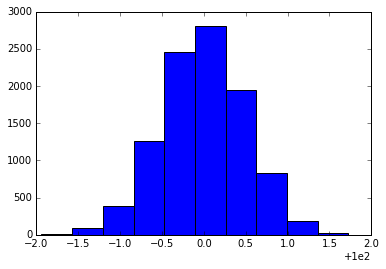

In [ ]:
ruido   = np.random.normal(100, 0.5, ntot)
plt.hist(ruido)

In [ ]:
M  = 120*pi/180.
ec = 0.3
print(M)

2.0943951023931953


In [ ]:
%time
i = 0
E = M
while i <= 1000:
  Ei = E
  E  = M+ec*sin(E)
  # print (E, M, ec, abs(Ei-E))
  i=i+1

# print (E,ec)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


In [ ]:

def ae(ec,M):
  i = 0
  E = M
  while i <= 100:
    Ei = E 
    E  = M+ec*sin(E)
  # print (E, M, ec, abs(Ei-E))
    i=i+1
    if (abs(E-Ei)<1e-5): break
  return E

In [ ]:
print (1e-5*9,e )
print (1e-9, ec )


9e-05 2.718281828459045
1e-09 0.3


In [ ]:
#elijo valores de 120 grados
ec=0.2
M=120*pi/180.
E = ae(ec,M)

# print (E, E[1])
print (E, M+ec*sin(E),sin(pi/2.) )

2.250008098528418 2.250008724309289 1.0


In [ ]:
def As(A,nu,t):
  func = A*sin(nu*t)
  return func

In [ ]:
A  = 10
nu = 0.5
t  = 5

print (As(A,nu,t))

5.984721441039565


In [ ]:
t=np.arange(0,100,1)
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
def Asnp(A,nu,t):   #modifico el sin, para que utilice libreria np y trabaja con vector
  funcnp = A*np.sin(nu*t)
  return funcnp

In [ ]:
# print (Asnp(A,nu,t)) ;
Vr = Asnp(A,nu,t)
print (Vr.shape, t.shape)

(100,) (100,)


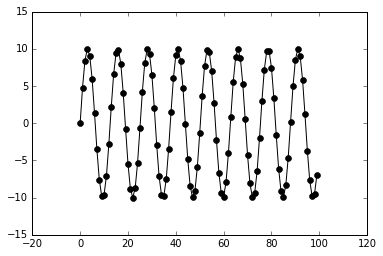

In [ ]:
plt.plot(t,Vr, marker='o', c='k')
plt.scatter(t,Vr, marker='o')


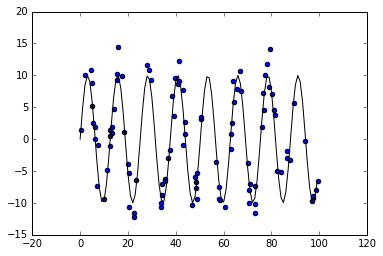

In [ ]:
# primera modificación es elegir datos aleatorios
# segunda sumar ruido
tobs  = np.random.uniform(0,100,100)

media = 0. 
sigma = 2 #fraccion de A 
error_gaus = np.random.normal(media, sigma, 100)

Vre = Asnp(A,nu,tobs) + error_gaus
 
plt.plot(t,Vr, c='k')
plt.scatter(tobs,Vre, marker='o', c='blue')

In [ ]:
def wrmsdatos(Vr,Vre,n):
  i=0
  sum=0.0
  while i<len(Vr):
    error_i     =0.2    #columna error va a ser dato
    error_jitter=0.2
    sigma_i = error_i**2+error_jitter**2

    sum=  (Vr[i]-Vre[i])**2 / sigma_i**2 + sum
    # print(sum,i)
    i = i+1
  return sum  

# data = np.loadtxt('datos.txt', usecols = (0, 1, 2))